In [1]:
import pickle

In [9]:
def load_from_pickle(name):
    with open(f'{name}.pkl', 'rb') as f:
        data = pickle.load(f)
        eigenvalues = data['eigenvalues']
        eigenvectors = data['eigenvectors']
        return eigenvalues, eigenvectors

In [18]:
EIGEN_FILE = "/home/hedwig/heetez/learning/3dcomputer_vision/visual_odo/roadmap/foundation/assets/eigen_save" 
eigenvalues, eigenvectors = load_from_pickle(EIGEN_FILE)
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(eigenvectors.shape)
print(eigenvalues.shape)

(8464, 8464)
(8464,)


## Learning to select top k eigenvectors and values

Explained Variance:

- First, compute the total variance captured by all the eigenvalues. This is simply the sum of all the eigenvalues.
- Sort the eigenvalues in descending order.
- Compute the cumulative sum of the sorted eigenvalues.
- Determine the number of top eigenvalues that capture a significant portion (e.g., 95% or 99%) of the total variance.
- This method provides a balance between reducing dimensionality and retaining the most important features of the data.

In [19]:
total_variance = sum(eigenvalues)
explained_variance = 0
k = 0
for i in range(len(eigenvalues)):
    explained_variance += eigenvalues[i]
    if explained_variance / total_variance >= 0.95:  # for 95% explained variance
        k = i + 1
        break

k

48

## Scree Plot:

- Plot the eigenvalues in descending order.
- This plot usually shows a sharp drop (elbow) after a few initial eigenvalues, indicating that most of the variance in the data can be captured by those few eigenvalues.
- You can visually inspect the plot to determine where this drop happens and choose kk accordingly.

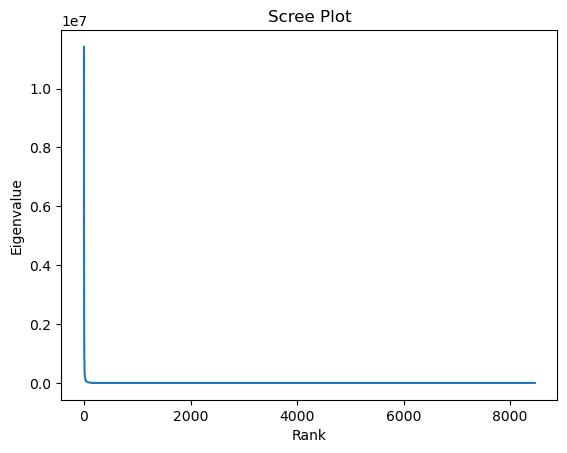

In [17]:
import matplotlib.pyplot as plt

sorted_eigenvalues = sorted(eigenvalues, reverse=True)
plt.plot(sorted_eigenvalues)
plt.ylabel('Eigenvalue')
plt.xlabel('Rank')
plt.title('Scree Plot')
plt.show()


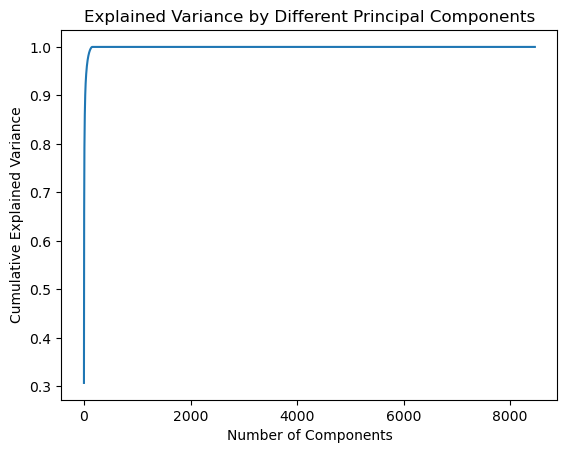

In [21]:
import matplotlib.pyplot as plt
import numpy as np

explained_var_ratio = eigenvalues / total_variance
plt.plot(np.cumsum(explained_var_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()
